<b> importing everything we need </b>

In [55]:
import pandas as pd
import re
import os
import csv
import string
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy




In [ ]:
# if you want to install
!spacy download en_core_web_trf

<b> CONVERSION </b>

<br>
The main corpus folder consists of six folders which consist of .txt files of each song on that album. Below is the conversion of this folder to a csv file.

In [56]:

# making a function that reads all the files in a folder (album) you feed it and adds it to a dictionary
def read_text_files(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                song_name = filename.replace('.txt', '')
                lyrics = file.read()
                data.append({"Album": os.path.basename(folder_path), "Song Name": song_name, "Lyrics": lyrics})
    return data

# a function that takes all the dictionaries per folder (album) and adds them all together in a CSV
def convert_to_csv(input_folders, output_csv):
    all_data = []
    for folder in input_folders:
        folder_data = read_text_files(folder)
        all_data.extend(folder_data)

    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ["Album", "Song Name", "Lyrics"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for row in all_data:
            writer.writerow(row)

input_folders = [
    "texts\\Suicide Season",
    "texts\\There Is A Hell",
    "texts\\Sempiternal",
    "texts\\That's The Spirit",
    "texts\\Amo",
    "texts\\Post Human"
]
output_csv = "BMTH_Discography.csv"

convert_to_csv(input_folders, output_csv)


In [57]:
# turning the CSV into a dataframe
csv_file = "BMTH_Discography.csv"
df = pd.read_csv(csv_file)

# Creating a column called 'Cleaned Lyrics', where the lyrics have been cleaned of whitespaces and are converted to lowercase.
df['Cleaned Lyrics'] = df['Lyrics'].str.replace('\s+', ' ', regex=True).str.strip()
df['Cleaned Lyrics'] = df['Cleaned Lyrics'].str.lower()

df.head()

,Album,Song Name,Lyrics,Cleaned Lyrics
0,Suicide Season,Chelsea Smile,I've got a secret.\nIt's on the tip of my tong...,i've got a secret. it's on the tip of my tongu...
1,Suicide Season,Death Breath,"The sun goes down, we come out, a different pa...","the sun goes down, we come out, a different pa..."
2,Suicide Season,Diamonds Aren't Forever,We will never sleep 'cause sleep is for the we...,we will never sleep 'cause sleep is for the we...
3,Suicide Season,Football Season Is Over,Why the fuck can I not hail a taxi?\nArm out l...,why the fuck can i not hail a taxi? arm out li...
4,Suicide Season,It Was Written in Blood,"Goodbye, my friend, goodbye, my love, you're i...","goodbye, my friend, goodbye, my love, you're i..."


<b> SPACY ANNOTATION </b>

In [58]:
nlp = spacy.load('en_core_web_trf')
print(nlp.pipe_names)

['transformer', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


This first uses spaCy to process the text, creating a token called 'Doc'

In [59]:
def process_text(text):
    return nlp(text)

In [60]:
df['Doc'] = df['Cleaned Lyrics'].apply(process_text)

This step tokenizes the processed text, creating a Tokenized version of the lyrics of every song in the CSV and dataframe

In [61]:
def get_token(doc):
    return [(token.text) for token in doc]
df['Tokens'] = df['Doc'].apply(get_token)

In [62]:
tokens = df[['Cleaned Lyrics', 'Tokens']].copy()
tokens.head()

,Cleaned Lyrics,Tokens
0,i've got a secret. it's on the tip of my tongu...,"[i, 've, got, a, secret, ., it, 's, on, the, t..."
1,"the sun goes down, we come out, a different pa...","[the, sun, goes, down, ,, we, come, out, ,, a,..."
2,we will never sleep 'cause sleep is for the we...,"[we, will, never, sleep, 'cause, sleep, is, fo..."
3,why the fuck can i not hail a taxi? arm out li...,"[why, the, fuck, can, i, not, hail, a, taxi, ?..."
4,"goodbye, my friend, goodbye, my love, you're i...","[goodbye, ,, my, friend, ,, goodbye, ,, my, lo..."


The following steps creates use the processed text in the 'Doc' column to create columns consisting of the Lemma's, Part-of-Speech, Named Entities and the words of Named Entities of the original processed text, every row being a BMTH song

In [63]:
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

df['Lemmas'] = df['Doc'].apply(get_lemma)

In [64]:
def get_pos(doc):
    return [(token.pos_, token.tag_) for token in doc]

df['POS'] = df['Doc'].apply(get_pos)

In [65]:
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

df['Named_Entities'] = df['Doc'].apply(extract_named_entities)

In [66]:
def extract_ne_words(doc):
    return [ent for ent in doc.ents]

df['NE_Words'] = df['Doc'].apply(extract_ne_words)

The last step shows the final result of the DataFrame 

In [67]:
df.head()

,Album,Song Name,Lyrics,Cleaned Lyrics,Doc,Tokens,Lemmas,POS,Named_Entities,NE_Words
0,Suicide Season,Chelsea Smile,I've got a secret.\nIt's on the tip of my tong...,i've got a secret. it's on the tip of my tongu...,"(i, 've, got, a, secret, ., it, 's, on, the, t...","[i, 've, got, a, secret, ., it, 's, on, the, t...","[I, have, get, a, secret, ., it, be, on, the, ...","[(PRON, PRP), (AUX, VBP), (VERB, VBD), (DET, D...","[TIME, TIME]","[(night), (night)]"
1,Suicide Season,Death Breath,"The sun goes down, we come out, a different pa...","the sun goes down, we come out, a different pa...","(the, sun, goes, down, ,, we, come, out, ,, a,...","[the, sun, goes, down, ,, we, come, out, ,, a,...","[the, sun, go, down, ,, we, come, out, ,, a, d...","[(DET, DT), (NOUN, NN), (VERB, VBZ), (ADP, RP)...","[TIME, DATE, TIME, TIME, DATE]","[(this, fucking, night), (days), (this, fuckin..."
2,Suicide Season,Diamonds Aren't Forever,We will never sleep 'cause sleep is for the we...,we will never sleep 'cause sleep is for the we...,"(we, will, never, sleep, 'cause, sleep, is, fo...","[we, will, never, sleep, 'cause, sleep, is, fo...","[we, will, never, sleep, 'cause, sleep, be, fo...","[(PRON, PRP), (AUX, MD), (ADV, RB), (VERB, VB)...",[CARDINAL],[(one)]
3,Suicide Season,Football Season Is Over,Why the fuck can I not hail a taxi?\nArm out l...,why the fuck can i not hail a taxi? arm out li...,"(why, the, fuck, can, i, not, hail, a, taxi, ?...","[why, the, fuck, can, i, not, hail, a, taxi, ?...","[why, the, fuck, can, I, not, hail, a, taxi, ?...","[(SCONJ, WRB), (DET, DT), (NOUN, NN), (AUX, MD...","[NORP, DATE, DATE, CARDINAL, TIME, TIME, TIME,...","[(nazi), (today), (today), (one), (last, night..."
4,Suicide Season,It Was Written in Blood,"Goodbye, my friend, goodbye, my love, you're i...","goodbye, my friend, goodbye, my love, you're i...","(goodbye, ,, my, friend, ,, goodbye, ,, my, lo...","[goodbye, ,, my, friend, ,, goodbye, ,, my, lo...","[goodbye, ,, my, friend, ,, goodbye, ,, my, lo...","[(INTJ, UH), (PUNCT, ,), (PRON, PRP$), (NOUN, ...",[],[]


Because the 'Doc' column is not necessary after the SpaCy analysis, we drop the column as not to have redundant information

In [68]:
df.drop("Doc", axis=1, inplace=True)

In [69]:
df.head()

,Album,Song Name,Lyrics,Cleaned Lyrics,Tokens,Lemmas,POS,Named_Entities,NE_Words
0,Suicide Season,Chelsea Smile,I've got a secret.\nIt's on the tip of my tong...,i've got a secret. it's on the tip of my tongu...,"[i, 've, got, a, secret, ., it, 's, on, the, t...","[I, have, get, a, secret, ., it, be, on, the, ...","[(PRON, PRP), (AUX, VBP), (VERB, VBD), (DET, D...","[TIME, TIME]","[(night), (night)]"
1,Suicide Season,Death Breath,"The sun goes down, we come out, a different pa...","the sun goes down, we come out, a different pa...","[the, sun, goes, down, ,, we, come, out, ,, a,...","[the, sun, go, down, ,, we, come, out, ,, a, d...","[(DET, DT), (NOUN, NN), (VERB, VBZ), (ADP, RP)...","[TIME, DATE, TIME, TIME, DATE]","[(this, fucking, night), (days), (this, fuckin..."
2,Suicide Season,Diamonds Aren't Forever,We will never sleep 'cause sleep is for the we...,we will never sleep 'cause sleep is for the we...,"[we, will, never, sleep, 'cause, sleep, is, fo...","[we, will, never, sleep, 'cause, sleep, be, fo...","[(PRON, PRP), (AUX, MD), (ADV, RB), (VERB, VB)...",[CARDINAL],[(one)]
3,Suicide Season,Football Season Is Over,Why the fuck can I not hail a taxi?\nArm out l...,why the fuck can i not hail a taxi? arm out li...,"[why, the, fuck, can, i, not, hail, a, taxi, ?...","[why, the, fuck, can, I, not, hail, a, taxi, ?...","[(SCONJ, WRB), (DET, DT), (NOUN, NN), (AUX, MD...","[NORP, DATE, DATE, CARDINAL, TIME, TIME, TIME,...","[(nazi), (today), (today), (one), (last, night..."
4,Suicide Season,It Was Written in Blood,"Goodbye, my friend, goodbye, my love, you're i...","goodbye, my friend, goodbye, my love, you're i...","[goodbye, ,, my, friend, ,, goodbye, ,, my, lo...","[goodbye, ,, my, friend, ,, goodbye, ,, my, lo...","[(INTJ, UH), (PUNCT, ,), (PRON, PRP$), (NOUN, ...",[],[]


<b> BONUS: for fun </b>

<b> AVERAGE WORDS PER ALBUM </b>

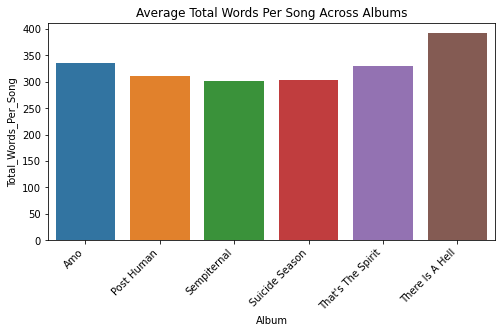

In [70]:
# Creating a new column called Total_Words_Per_Song, which contains the number of words per song.
df['Total_Words_Per_Song'] = df['Cleaned Lyrics'].apply(lambda x: len(str(x).split()))

# Creating a variable consisting of the average words per song per Album
average_total_words_per_song = df.groupby('Album')['Total_Words_Per_Song'].mean().reset_index()


# Using sns and madplotlib to create a nice visualization of the averages.
plt.figure(figsize=(8, 4))
sns.barplot(x='Album', y='Total_Words_Per_Song', data=average_total_words_per_song)
plt.title('Average Total Words Per Song Across Albums')
plt.xticks(rotation=45, ha='right')
plt.show()

<b> SENTIMENT ANALYSIS </b>

In [71]:
# Applying the TextBlob sentiment analysis feature to create a new column in the dataframe for the Sentiment Score per song
df['Sentiment'] = df['Cleaned Lyrics'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

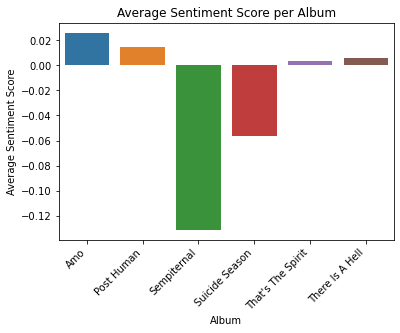

In [72]:
# Creating a variable that has the average sentiment score of all songs per Album
avg_sentiment_per_album = df.groupby('Album')['Sentiment'].mean().reset_index()

# Using seaborn and madplotlib to create a nice visualization of the averages per Album
sns.barplot(x='Album', y='Sentiment', data=avg_sentiment_per_album)
plt.title('Average Sentiment Score per Album')
plt.xlabel('Album')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusion

Because we are working with copyrighted material, we are going to delete the 'Lyrics' and the 'Cleaned_Lyrics' columns from the dataframe and the CSV. People can still see the how I processed the .txt files to a csv, how I analyzed it and what information we gained from the data exploration, so it is reproducible. 

The final CSV file will only contain the tokenized and annotated lyrics, which falls under fair use, but not the lyrics itself.

In [73]:
df.drop("Lyrics", axis=1, inplace=True)


df.drop("Cleaned Lyrics", axis=1, inplace=True)

In [74]:
df.to_csv('BMTH_Discography_annotation.csv')

In [75]:
df.head()

,Album,Song Name,Tokens,Lemmas,POS,Named_Entities,NE_Words,Total_Words_Per_Song,Sentiment
0,Suicide Season,Chelsea Smile,"[i, 've, got, a, secret, ., it, 's, on, the, t...","[I, have, get, a, secret, ., it, be, on, the, ...","[(PRON, PRP), (AUX, VBP), (VERB, VBD), (DET, D...","[TIME, TIME]","[(night), (night)]",409,-0.016402
1,Suicide Season,Death Breath,"[the, sun, goes, down, ,, we, come, out, ,, a,...","[the, sun, go, down, ,, we, come, out, ,, a, d...","[(DET, DT), (NOUN, NN), (VERB, VBZ), (ADP, RP)...","[TIME, DATE, TIME, TIME, DATE]","[(this, fucking, night), (days), (this, fuckin...",355,-0.093721
2,Suicide Season,Diamonds Aren't Forever,"[we, will, never, sleep, 'cause, sleep, is, fo...","[we, will, never, sleep, 'cause, sleep, be, fo...","[(PRON, PRP), (AUX, MD), (ADV, RB), (VERB, VB)...",[CARDINAL],[(one)],441,-0.007317
3,Suicide Season,Football Season Is Over,"[why, the, fuck, can, i, not, hail, a, taxi, ?...","[why, the, fuck, can, I, not, hail, a, taxi, ?...","[(SCONJ, WRB), (DET, DT), (NOUN, NN), (AUX, MD...","[NORP, DATE, DATE, CARDINAL, TIME, TIME, TIME,...","[(nazi), (today), (today), (one), (last, night...",127,-0.218182
4,Suicide Season,It Was Written in Blood,"[goodbye, ,, my, friend, ,, goodbye, ,, my, lo...","[goodbye, ,, my, friend, ,, goodbye, ,, my, lo...","[(INTJ, UH), (PUNCT, ,), (PRON, PRP$), (NOUN, ...",[],[],317,0.178788
